### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')


In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [4]:
df=df.drop(columns=['Car_ID'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              100 non-null    object
 1   Model              100 non-null    object
 2   Year               100 non-null    int64 
 3   Kilometers_Driven  100 non-null    int64 
 4   Fuel_Type          100 non-null    object
 5   Transmission       100 non-null    object
 6   Owner_Type         100 non-null    object
 7   Mileage            100 non-null    int64 
 8   Engine             100 non-null    int64 
 9   Power              100 non-null    int64 
 10  Seats              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


In [6]:
df.shape

(100, 12)

In [7]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [8]:
df.isnull().sum()

Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
Lbl = LabelEncoder()

In [10]:
# categorical columns
categorical_columns=[column for column in df.columns if df[column].dtype=="O"]

In [11]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: Lbl.fit_transform(x))

### Visualization

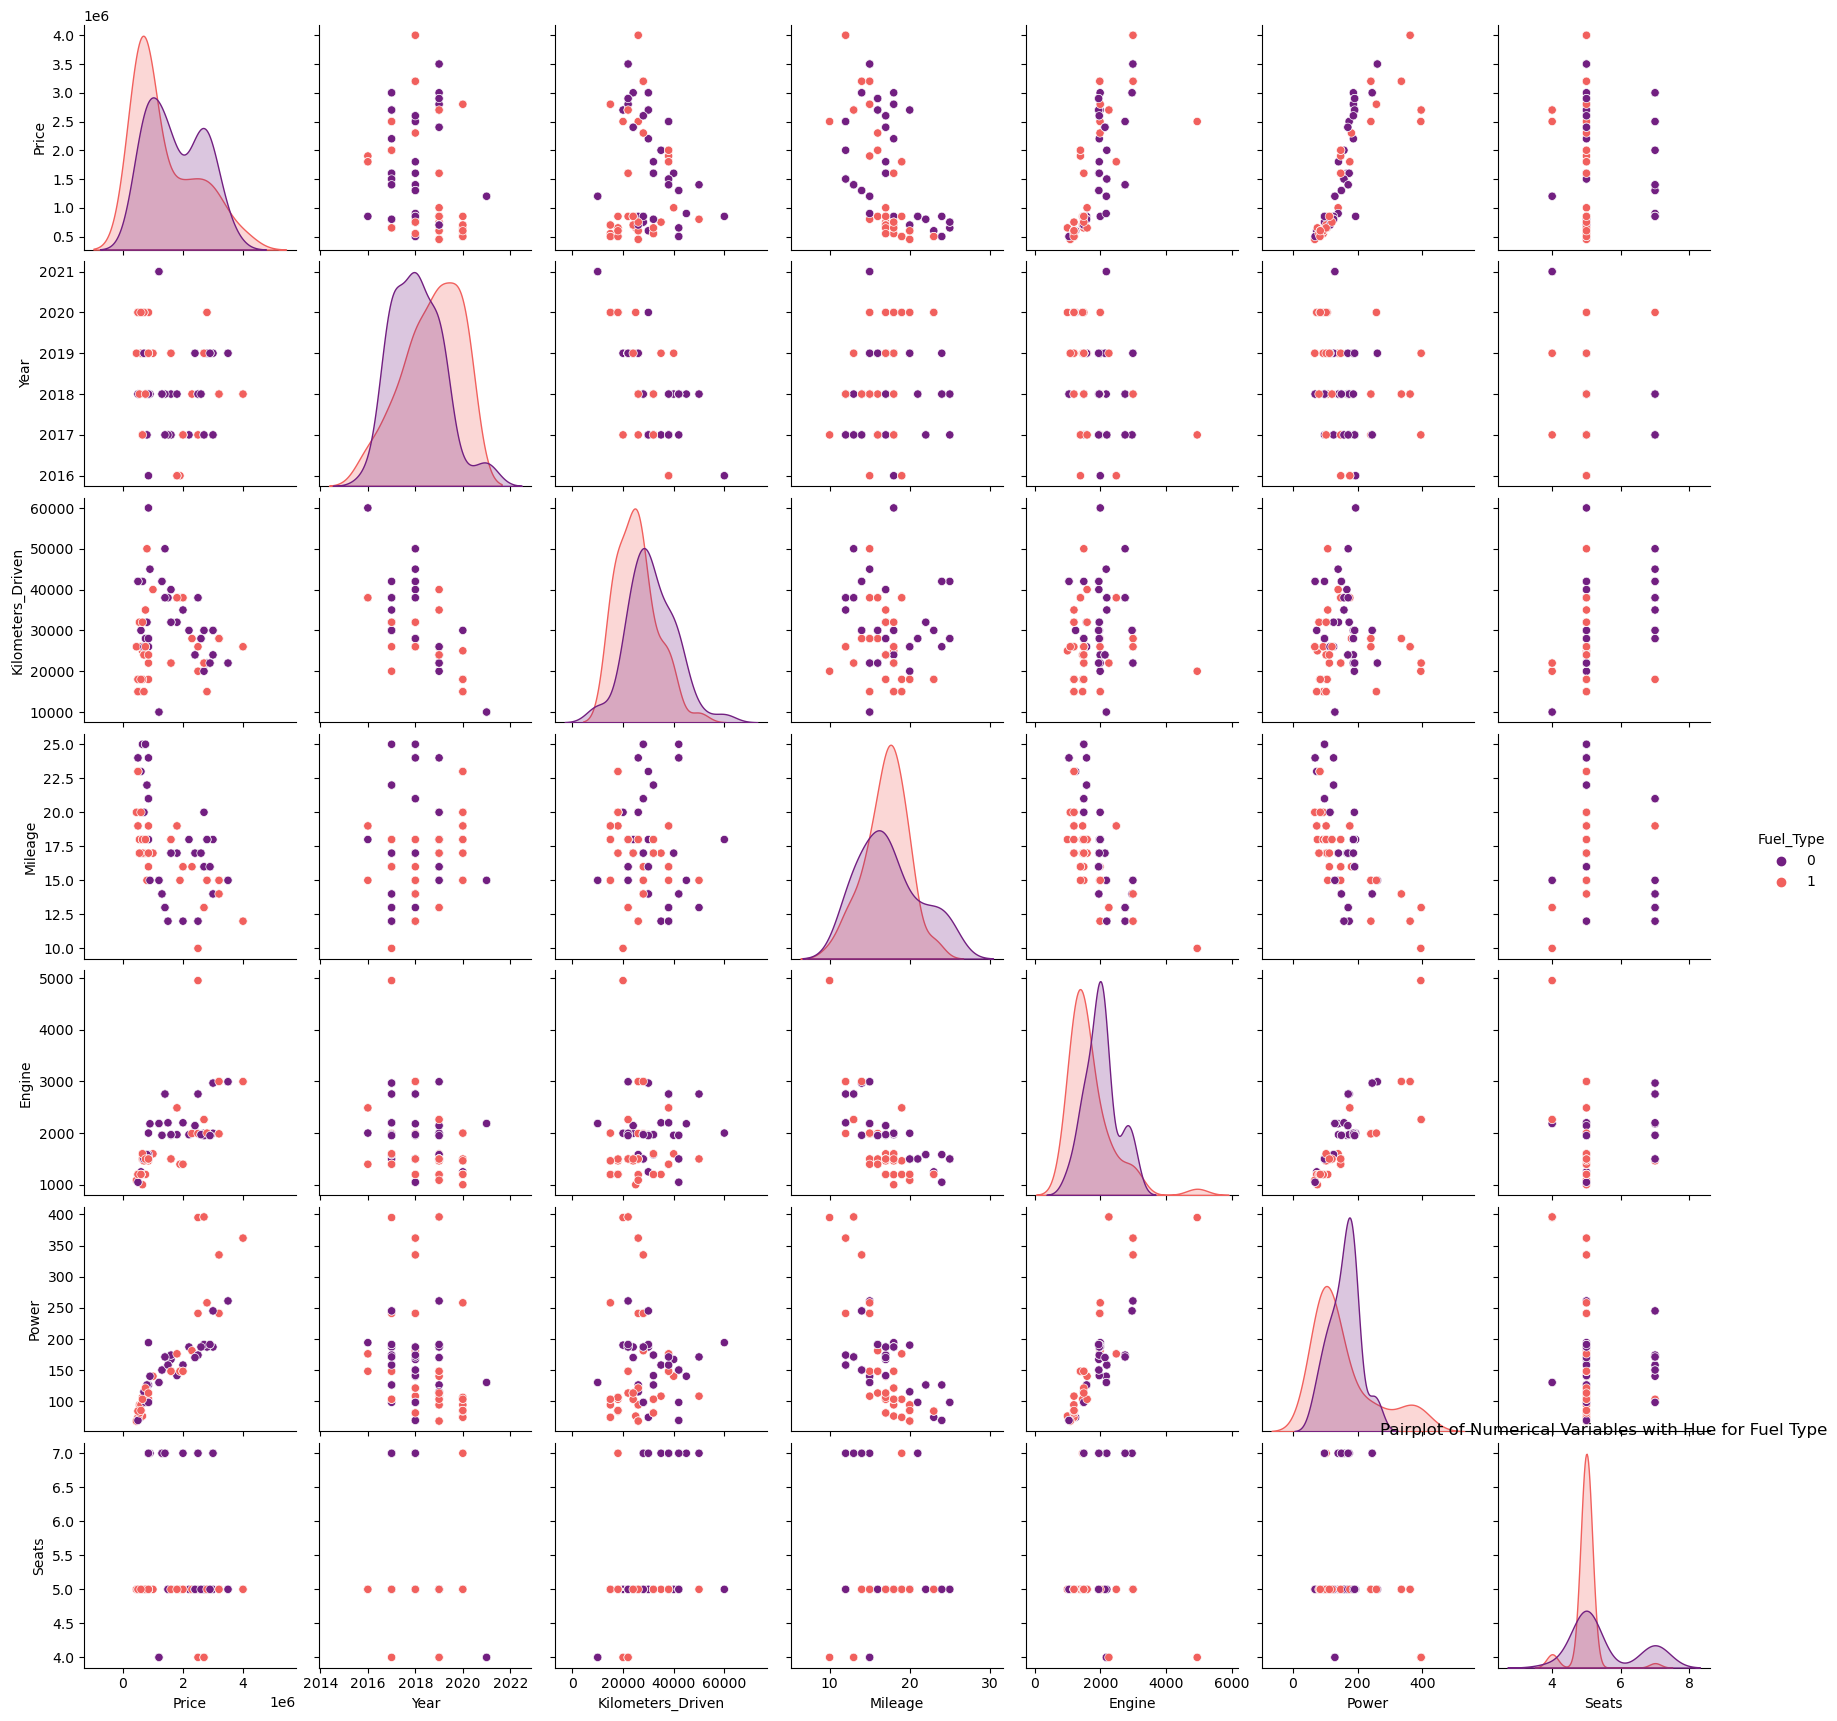

In [12]:
# Pairplot
columns_to_include = ['Price', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Type']
sns.pairplot(df[columns_to_include], hue='Fuel_Type', palette='magma')
plt.title('Pairplot of Numerical Variables with Hue for Fuel Type')
plt.show()

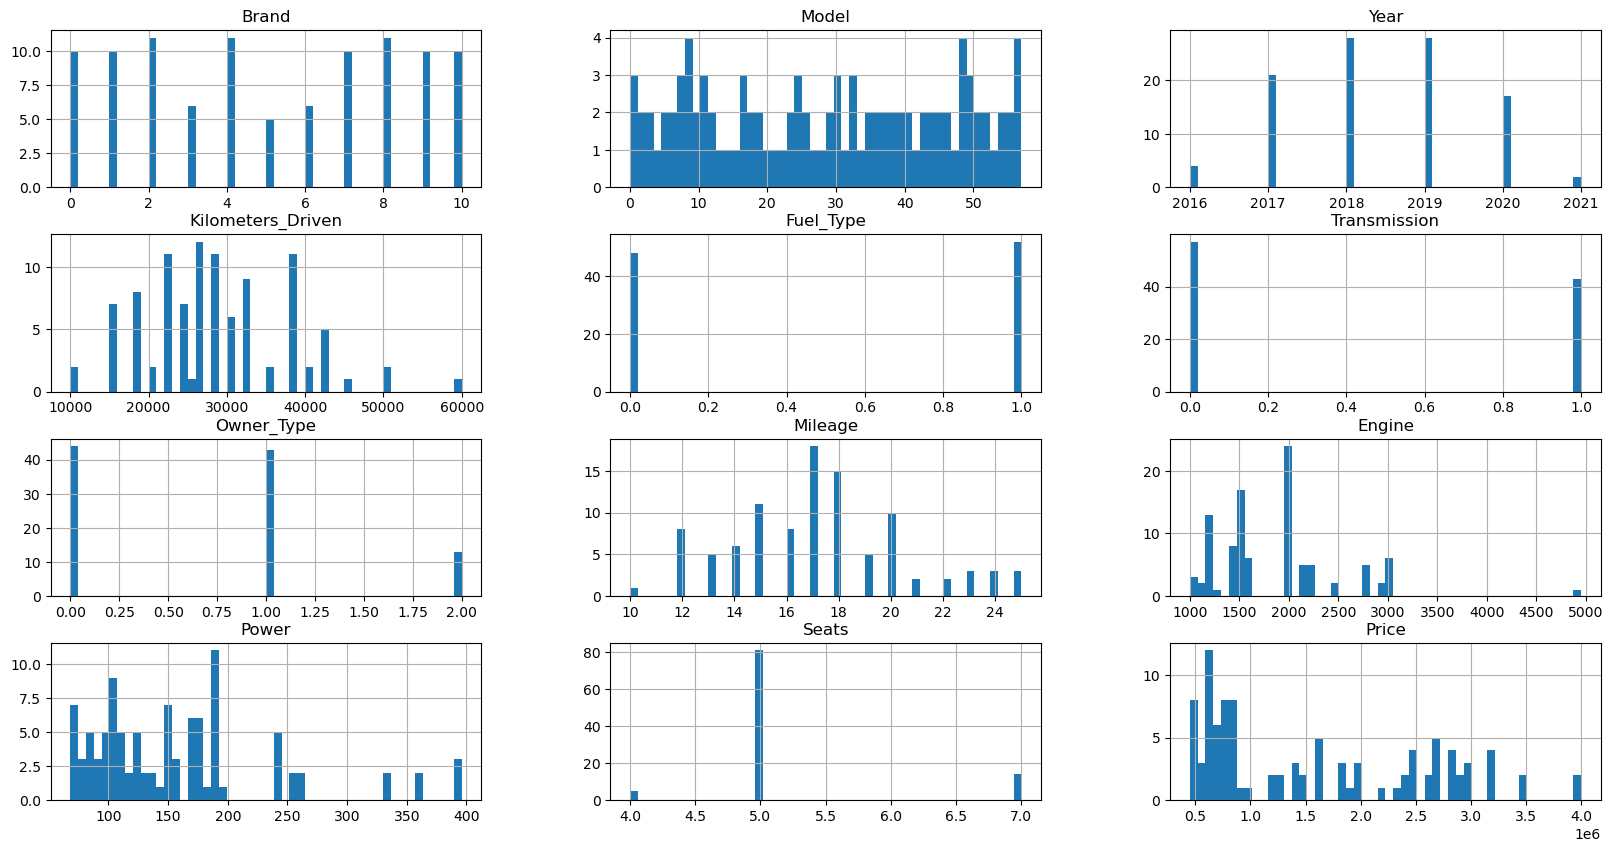

In [13]:
df.hist(figsize=(20,10),bins = 50)
plt.show()

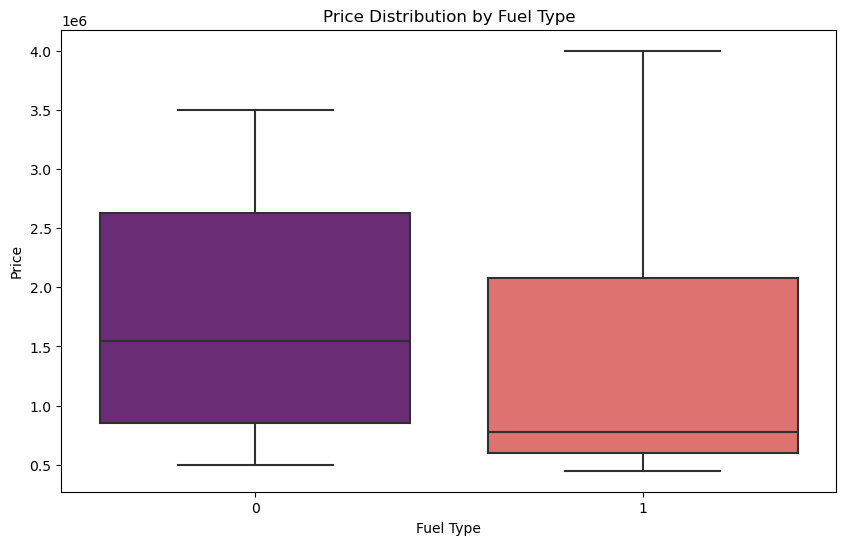

In [30]:
#  box plot of Price vs. Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette="magma")
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

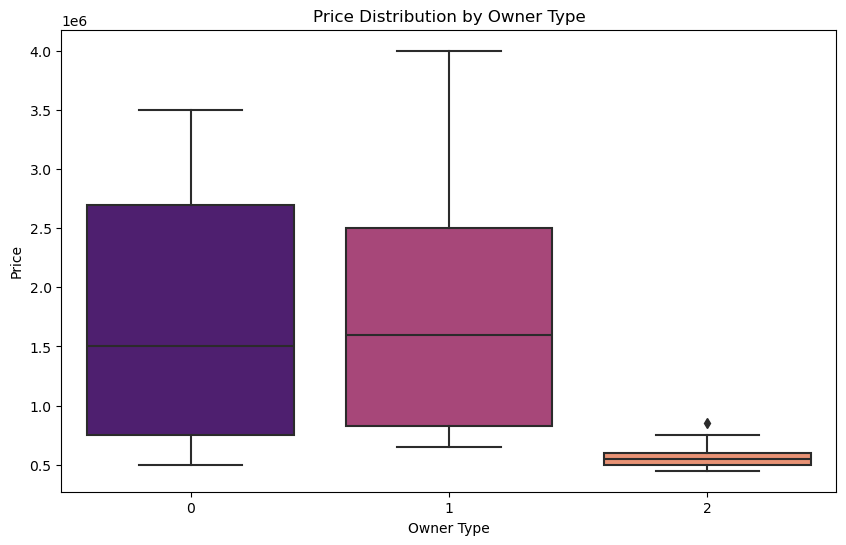

In [34]:
# box plot for Owner_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Owner_Type', y='Price', data=df,palette="magma")
plt.title('Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.show()

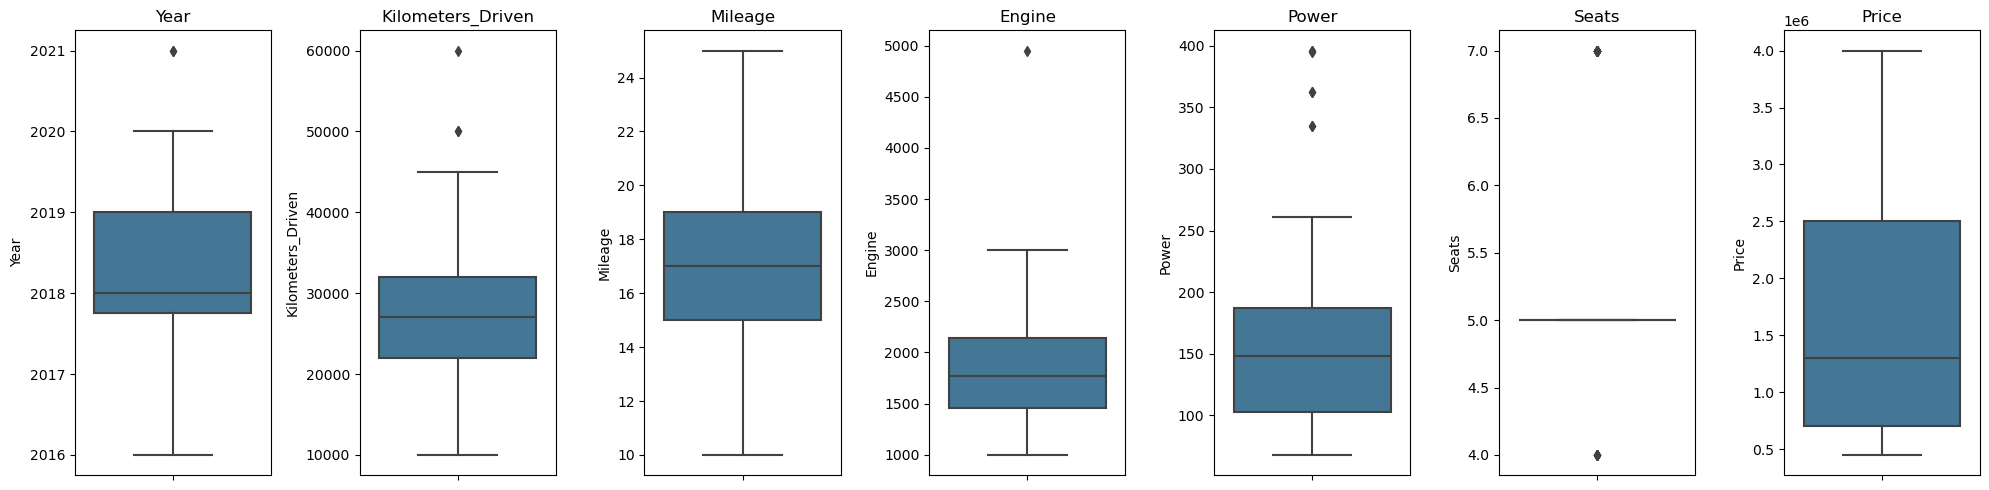

In [17]:

boxplot_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
for i, column in enumerate(boxplot_columns):
    sns.boxplot(y=df[column], ax=axes[i], palette='mako')
    axes[i].set_title(column)
plt.tight_layout()
plt.show()


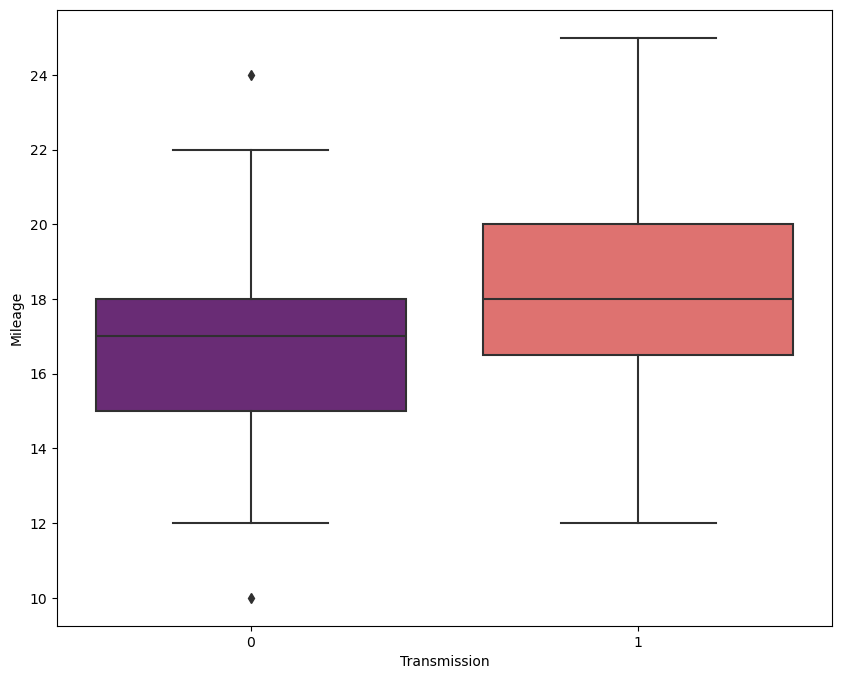

In [18]:
# Mileage vs Transmission
plt.figure(figsize=(10,8))
sns.boxplot(x='Transmission',y='Mileage',data=df, palette='magma')
plt.xlabel('Transmission')
plt.ylabel('Mileage')
plt.show()

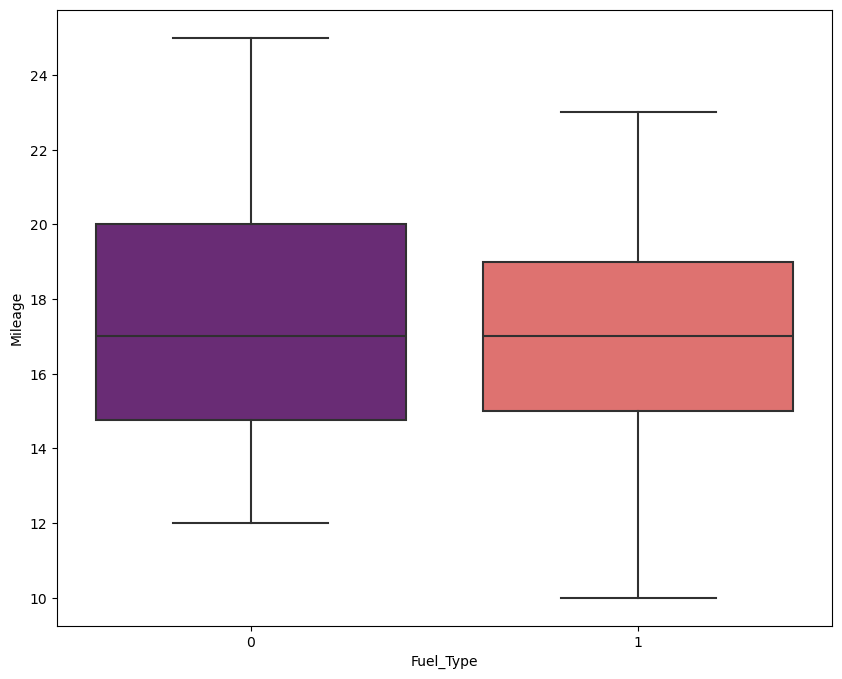

In [19]:
# Mileage vs fuel_type
plt.figure(figsize=(10,8))
sns.boxplot(x="Fuel_Type", y="Mileage", data=df, palette='magma')
plt.xlabel('Fuel_Type')
plt.ylabel('Mileage')
plt.show()

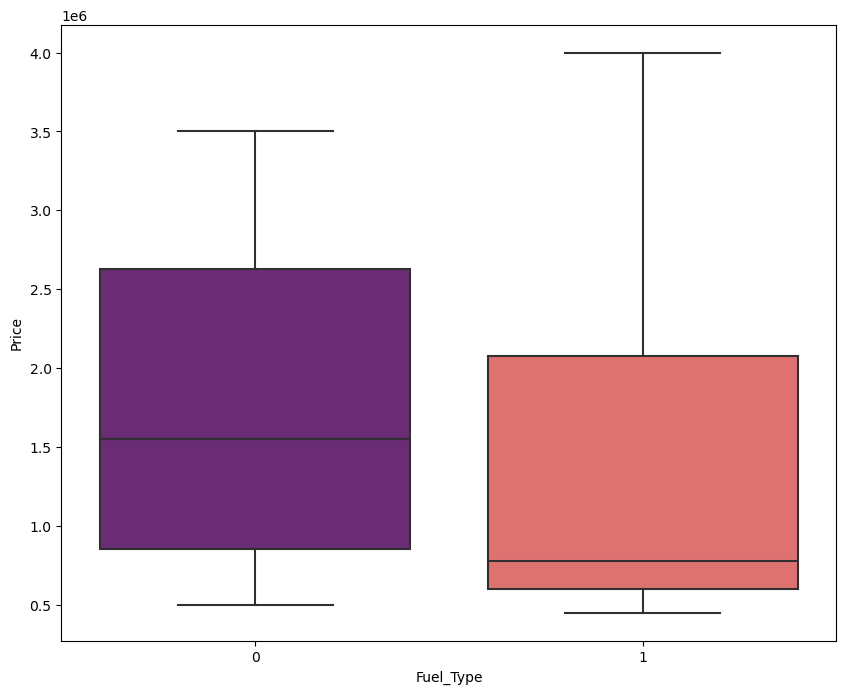

In [20]:
# Fuel type vs price
plt.figure(figsize=(10,8))
sns.boxplot(x='Fuel_Type',y='Price',data=df,palette="magma")
plt.xlabel('Fuel_Type')
plt.ylabel('Price')
plt.show()

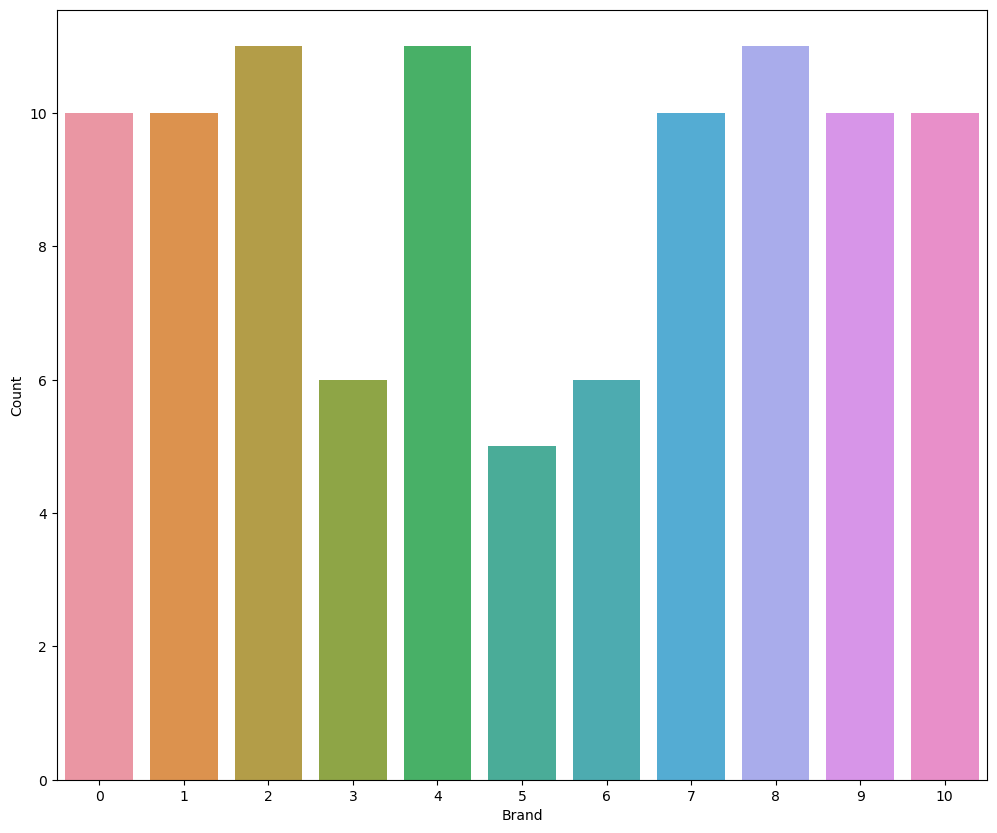

In [21]:
# Brand counterplot
plt.figure(figsize=(12, 10))
sns.countplot(x='Brand', data=df,)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

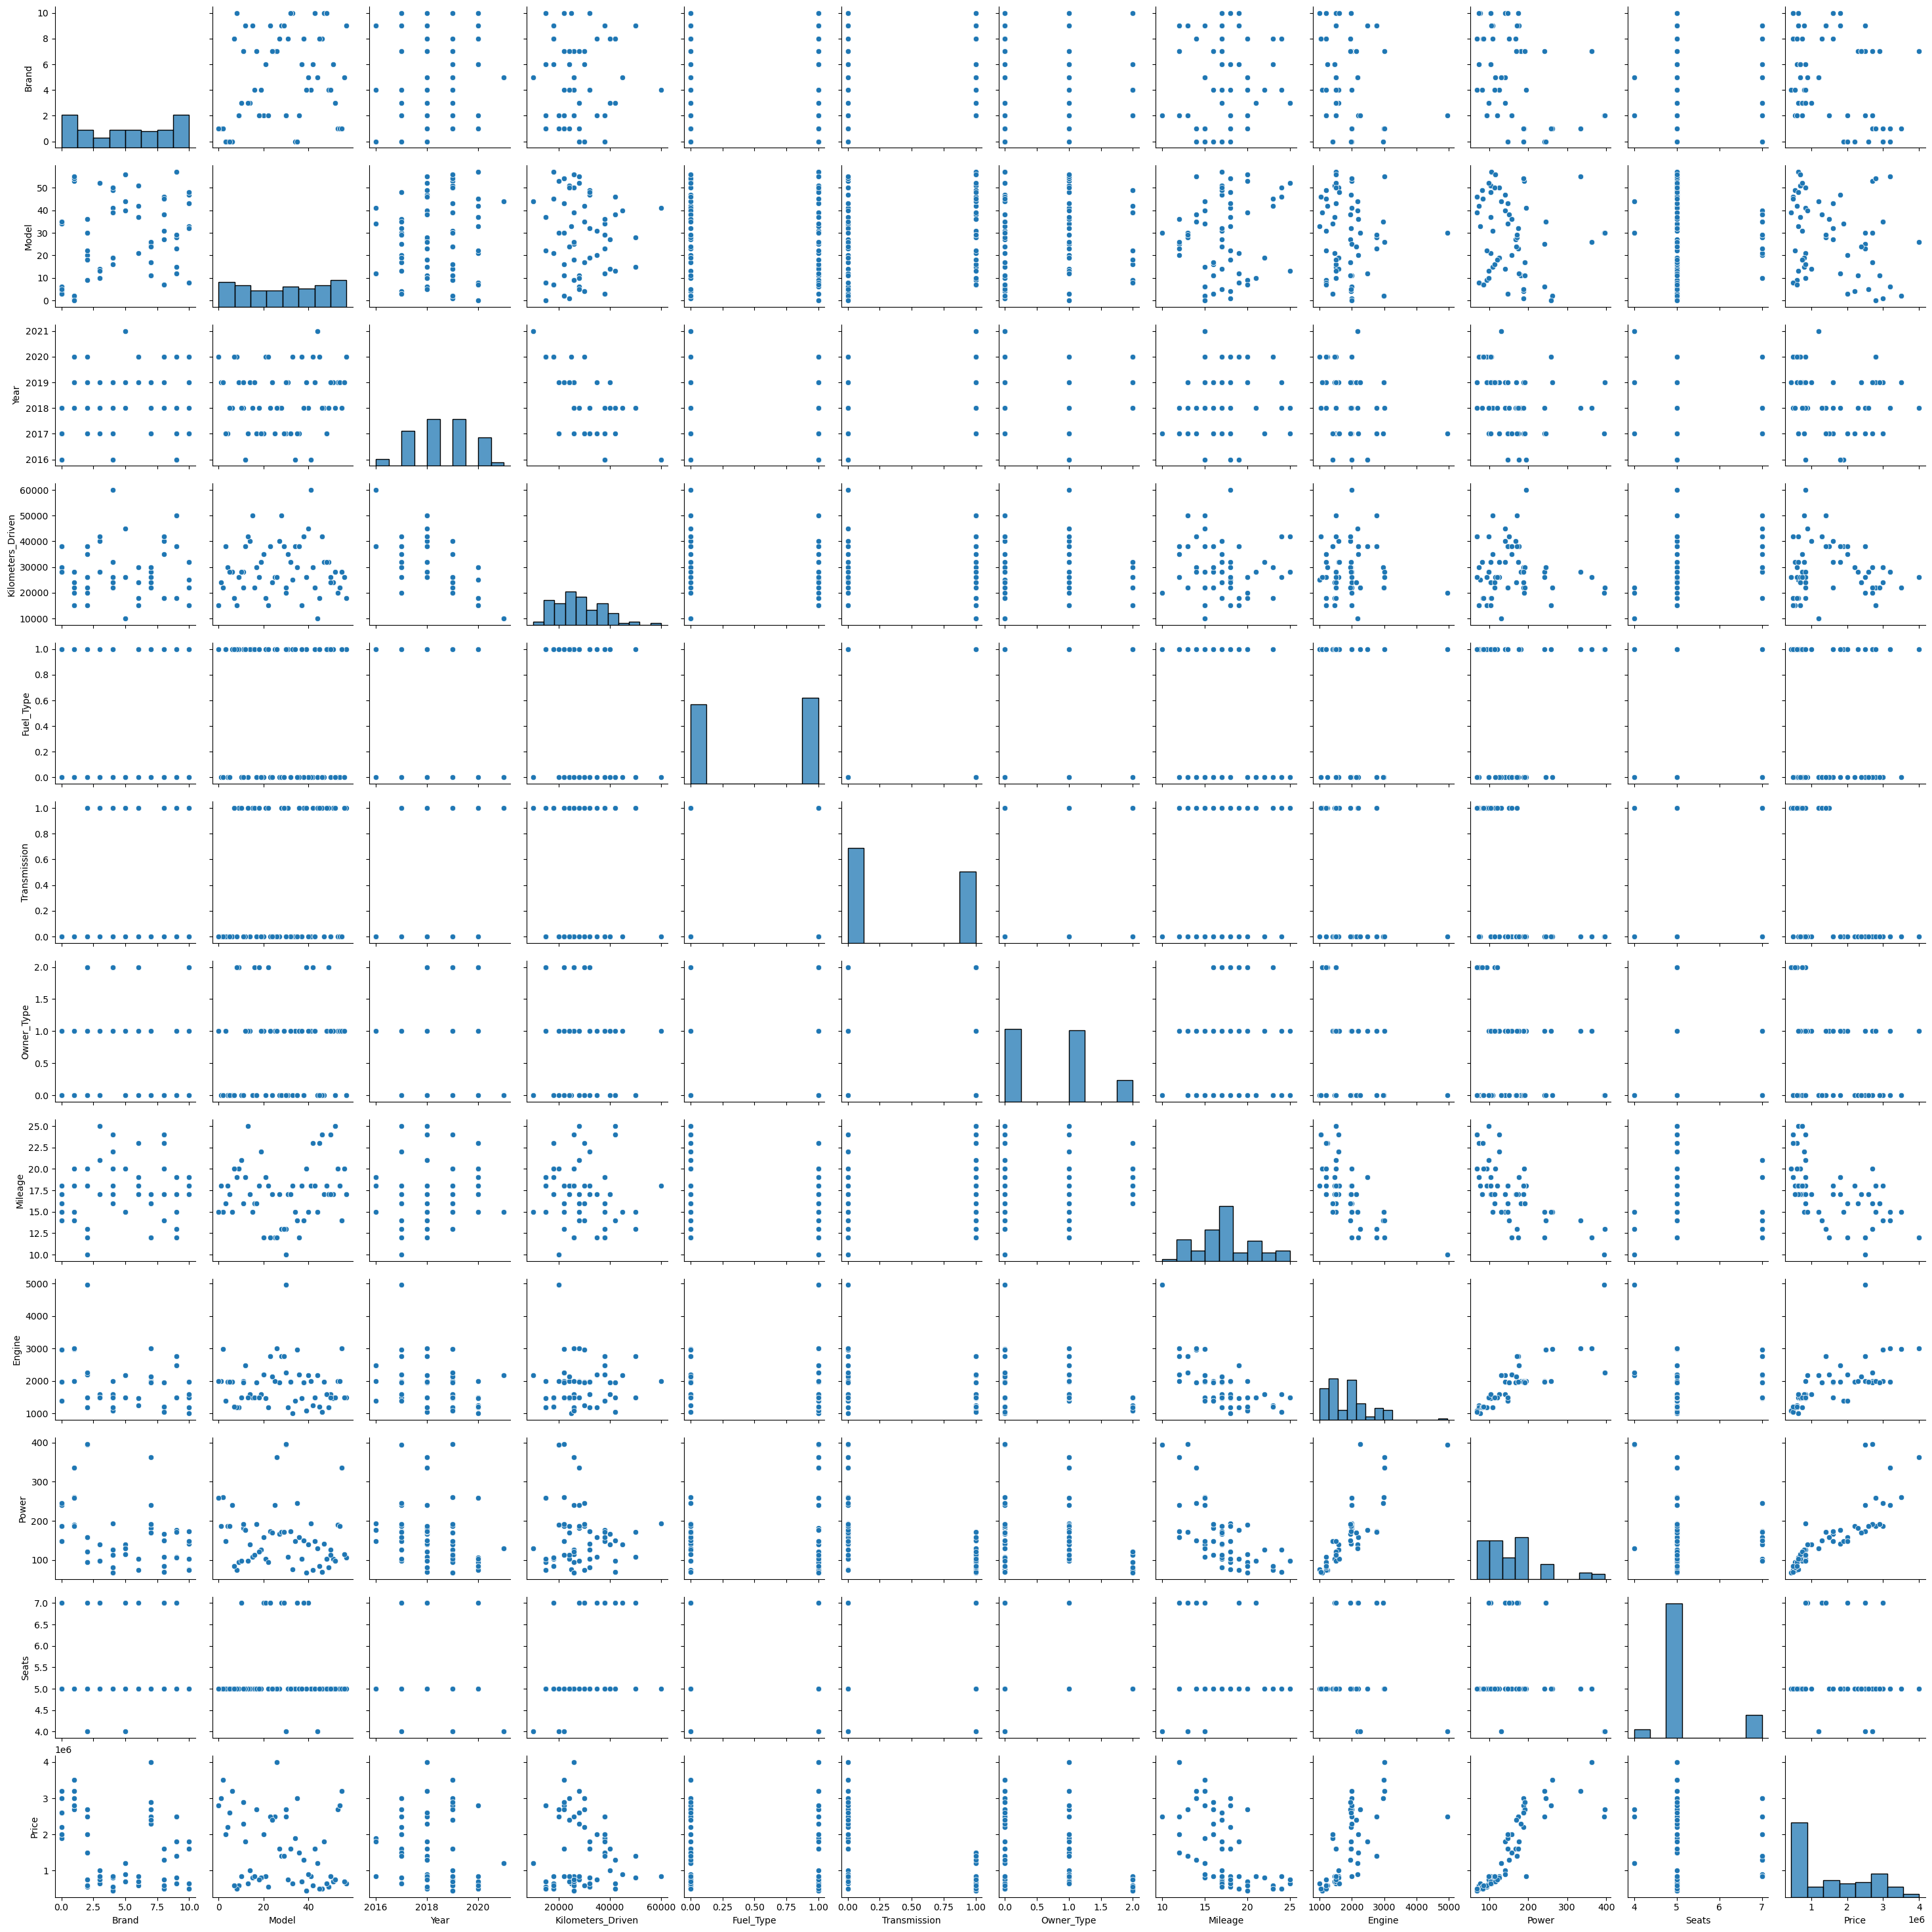

In [22]:
sns.pairplot(df)
plt.show()

### Splitting the input and target variable

In [23]:
X=df.drop(['Price'],axis=1)
Y=df[['Price']]

### Feature scaling the x and y variables.

In [24]:
scaler_X = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler_Y = StandardScaler(copy=True, with_mean=True, with_std=True)

X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

### Splitting The DataSet into Train And Test Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42, shuffle =True)

### Model Selection

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model = RandomForestRegressor(n_estimators=150,random_state=33)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=33)

In [28]:
y_pred = model.predict(X_test)

In [29]:

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Setting squared=False gives RMSE
print("Root Mean Squared Error (RMSE):", rmse)

# R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)
print('RMSE =:' , np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 0.16915690850719212
Mean Squared Error (MSE): 0.09534816908186955
Root Mean Squared Error (RMSE): 0.3087849884334884
R^2 score: 0.908829614428853
RMSE =: 0.3087849884334884
